<a href="https://colab.research.google.com/github/cyss93/CP1_team8/blob/main/retention_LTV_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
seller_3088 = pd.read_csv('/content/drive/MyDrive/olist/seller_3088.csv')
seller_379 = pd.read_csv('/content/drive/MyDrive/olist/seller_379.csv')

In [ ]:
# 데이터 보충
seller_3088['mean_quarter_profit'] = (seller_3088['total_profit']/(seller_3088['sale_days']//30 + 1)) * 3    # 판매자별 분기 매출액 예측치
seller_379['mean_quarter_profit'] = (seller_379['total_profit']/(seller_379['sale_days']//30 + 1)) * 3

In [ ]:
# retention 함수
def retention(df,days,interval):
  date = list(range(interval,days+1,interval))
  df_X = df[df['registration_days']>=days]
  ret = [ len(df_X[df_X['sale_days']>=x-interval])/len(df_X) if ((len(df_X[df_X['sale_days']>=x])>0) and len(df_X)>0) else None for x in date ]
  return date, ret

# 3088명 데이터 retention

데이터 개수 : 1261


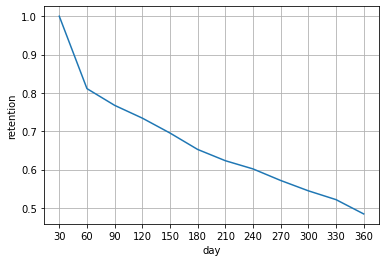

In [ ]:
# 기본 retention

df = seller_3088
days = 365
interval = 30

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)
ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])
print('데이터 개수 :', len(df[df['registration_days']>=days]))

데이터 개수 : 1261


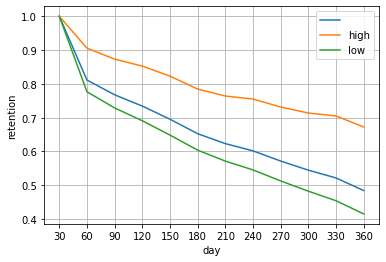

In [ ]:
# 분기별 평균 매출에 따른 retention

df = seller_3088
days = 365
interval = 30

df_high = df[df['mean_quarter_profit']>=df['mean_quarter_profit'].describe()['75%']]
df_low = df[df['mean_quarter_profit']<df['mean_quarter_profit'].describe()['75%']]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_high,days,interval)[0],retention(df_high,days,interval)[1])
plt.plot(retention(df_low,days,interval)[0],retention(df_low,days,interval)[1])
plt.legend(['', 'high', 'low'])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)
ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])
print('데이터 개수 :', len(df[df['registration_days']>=days]))

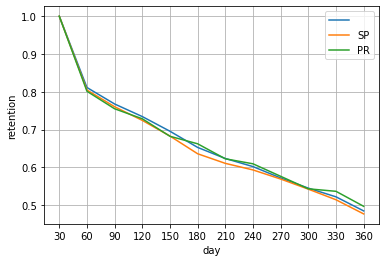

In [ ]:
# 판매자 지역에 따른 retention

df = seller_3088
days = 365
interval = 30
variable = 'seller_state'

df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)

16년 4분기의 데이터 개수 : 144
17년 1분기의 데이터 개수 : 550
17년 2분기의 데이터 개수 : 314
17년 3분기의 데이터 개수 : 273


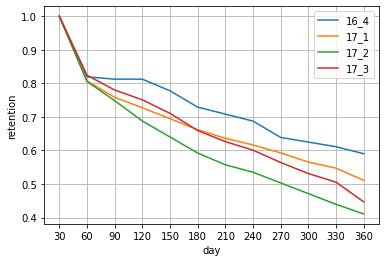

In [ ]:
# cohorts 분석
days = 360
interval = 30
legend = []

for x in sorted(list(set(seller_3088['registration_quarter']))):
  df = seller_3088[seller_3088['registration_quarter']==x]
  if len(df[df['registration_days']>=days])>0 and x !='etc':
    plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
    print(f'{x[:2]}년 {x[-1:]}분기의 데이터 개수 :',len(df[df['registration_days']>=days]))
    legend.append(x)
  ax = plt.subplot()
  ax.set_xticks(retention(df,days,interval)[0])

plt.legend(legend)
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)

# 379명 데이터 retention

데이터 개수 : 117


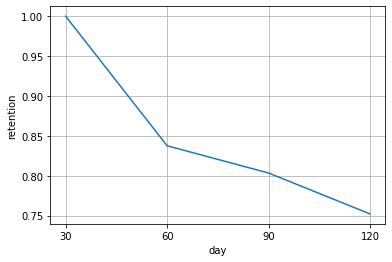

In [ ]:
# 기본 retention

df = seller_379
days = 120
interval = 30

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)
ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

print('데이터 개수 :', len(df[df['registration_days']>=days]))

organic_search 데이터 개수 : 113
paid_search 데이터 개수 : 101


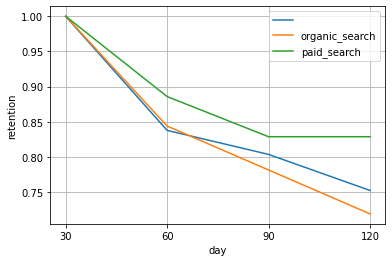

In [ ]:
# 유입 방식에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'origin'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

4b339f9567d060bcea4f5136b9f5949e 데이터 개수 : 70
068066e24f0c643eb1d089c7dd20cd73 데이터 개수 : 43


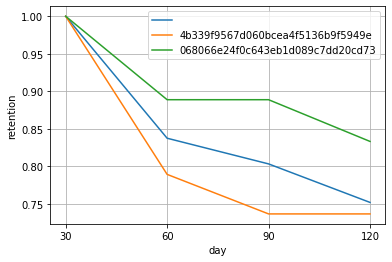

In [ ]:
# 담당자에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'sdr_id'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

4ef15afb4b2723d8f3d81e51ec7afefe 데이터 개수 : 75
d3d1e91a157ea7f90548eef82f1955e3 데이터 개수 : 41


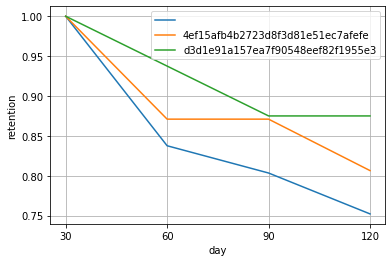

In [ ]:
# 담당자(2)에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'sr_id'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

health_beauty 데이터 개수 : 45
home_decor 데이터 개수 : 44


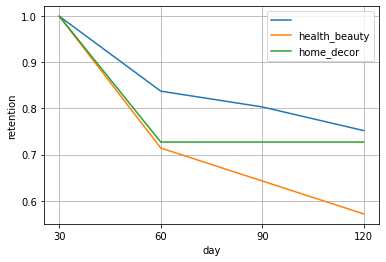

In [ ]:
# 취급 품목에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'business_segment'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

online_medium 데이터 개수 : 171
online_big 데이터 개수 : 79


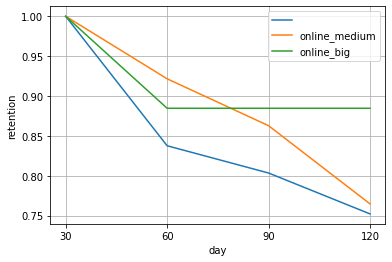

In [ ]:
# 영업 형태에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'lead_type'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.xlabel('day')
plt.ylabel('retention')
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

# 3088명 데이터 LTV

In [ ]:
def LTV(df,re,com,cost,AC):
  df['mean_quarter_profit'] = (df['total_profit']/(df['sale_days']//30 + 1)) * 3    # 판매자별 분기 매출액 예측치
  Q1 = df['mean_quarter_profit'].quantile(0.25)
  Q2 = df['mean_quarter_profit'].quantile(0.5)
  Q3 = df['mean_quarter_profit'].quantile(0.75)
  IQR = Q3 - Q1

  M = df[(df['mean_quarter_profit'] > (Q1 - 1.5*IQR))&(df['mean_quarter_profit'] < (Q3 + 1.5*IQR))]['mean_quarter_profit'].mean()   # 판매자들의 분기 매출액 평균 (이상치 제외)

  LTV = (M*com-cost)/(1-re) - AC

  return LTV

In [ ]:
# 현재 LTV
df = seller_3088
re = retention(df,90,30)[1][2]
com = 0.1 # 수수료
cost = 20 # 유지 비용
AC = 50 # 고객(=판매자) 획득 비용

LTV(df,re,com,cost,AC)

# 예상 분기 매출액 평균 약 621
# 예상 수명 약 4분기
# 수명이 짧으므로 이자율(=물가 상승률) 고려하지 않음

112.2472761819918

현재 분기당 판매자 유지율 : 0.7402799377916018


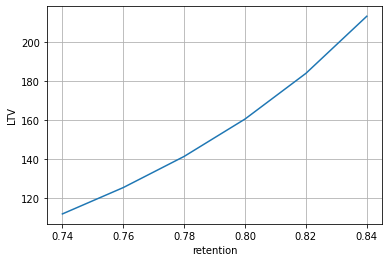

In [ ]:
# retention 에 따른 LTV
print('현재 분기당 판매자 유지율 :',retention(df,90,30)[1][2])
re_list = [0.74, 0.76, 0.78, 0.80, 0.82, 0.84]

plt.plot(re_list,[LTV(df,re,com,cost,AC) for re in re_list])
ax = plt.subplot()
ax.set_xticks(re_list)
plt.xlabel('retention')
plt.ylabel('LTV')
plt.grid(True)

현재 판매자 유지 비용 : 20


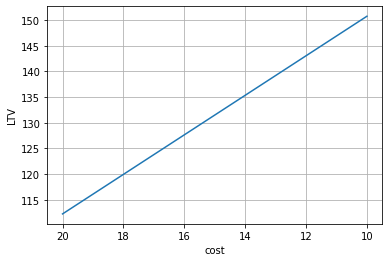

In [ ]:
# cost 에 따른 LTV
print('현재 판매자 유지 비용 :',cost)
cost_list = [20,18,16,14,12,10]

plt.plot(cost_list,[LTV(df,re,com,cost,AC) for cost in cost_list])
ax = plt.subplot()
ax.set_xticks(cost_list)
ax.invert_xaxis()
plt.xlabel('cost')
plt.ylabel('LTV')
plt.grid(True)

수수료 인상률 : 1.0%p


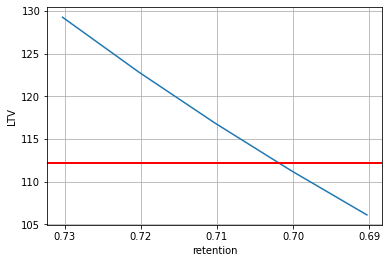

In [ ]:
# 수수료 인상 - 리텐션 하락에 따른 LTV
rise = 0.01
print(f'수수료 인상률 : {rise*100}%p')
x = [0.01,0.02,0.03,0.04,0.05]
re_list = [re - i for i in x]

plt.plot(re_list,[LTV(df,re,com+rise,cost,AC) for re in re_list])
ax = plt.subplot()
ax.set_xticks(list(map(lambda x:round(x,2),re_list)))
ax.invert_xaxis()
plt.axhline(LTV(df,re,com,cost,AC), color='red', linestyle='-', linewidth=2)
plt.xlabel('retention')
plt.ylabel('LTV')
plt.grid(True)